In [7]:
import cdflib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from utc_jday_conv import utc, utc_diff, jd
from kamodo_ccmc.flythrough.utils import ConvertCoord
from sgp4.api import Satrec, jday
from datetime import datetime
import re
r_e = 6371. # radius of earth
int_df = pd.read_pickle('intervals.pkl')

### waveform energy

In [8]:
# import CDF (monthly)

wfe = cdflib.CDF('../waveform-energy/C2_CP_WHI_WAVE_FORM_ENERGY__20111101_000000_20111201_000000_V150117.cdf')

In [3]:
%%time
# generate pandas datetimes
t = pd.to_datetime(pd.Series(cdflib.cdfepoch.encode(wfe['time_tags__C2_CP_WHI_WAVE_FORM_ENERGY'])))
np.save('whi_dt_1109.npy',t)

In [15]:
%%time
# generate unix timestamps
t_utc = cdflib.cdfepoch.unixtime(wfe['time_tags__C2_CP_WHI_WAVE_FORM_ENERGY'])
np.save('whi_t_1111.npy',t_utc)

CPU times: total: 6min 54s
Wall time: 6min 58s


In [3]:
def gap_match(file,interval):
    t_diff = file[1:]-file[:-1]
    gap_index = np.nonzero(t_diff>interval)
    gap_start = file[gap_index]
    gap_end = file[gap_index[0]+1]
    
    gap_match = []
    
    for i in range(int_df.index[-1]):
        sta = int_df['dt1-utc'][i]
        end = int_df['dt2-utc'][i]
        tuple_length_1 = len(tuple(set(np.nonzero(gap_start < sta)[0]) & set(np.nonzero(gap_end > end)[0])))
        tuple_length_2 = len(tuple(set(np.nonzero(gap_start > sta)[0]) & set(np.nonzero(gap_start < end)[0])))
        tuple_length_3 = len(tuple(set(np.nonzero(gap_end > sta)[0]) & set(np.nonzero(gap_end < end)[0])))
        if (tuple_length_1 or tuple_length_2 or tuple_length_3) != 0:
            gap_match = np.append(gap_match, i)
    
    return gap_match

In [9]:
# importing dates from 2010 October to 2011 November

ub = np.load('./whi_t_1011_1105.npy')
u5 = np.load('./whi_t_1105.npy')
u6 = np.load('./whi_t_1106.npy')
u7 = np.load('./whi_t_1107.npy')
u8 = np.load('./whi_t_1108.npy')
u9 = np.load('./whi_t_1109.npy')
u10 = np.load('./whi_t_1110.npy')
u11 = np.load('./whi_t_1111.npy')
unix_time = np.concatenate((ub,u5,u6,u7,u8,u9,u10,u11))

In [19]:
available = sorted(list(set(np.arange(4,164)) - set(gap_match(unix_time,600))))
int_df.loc[available,['dt1','dt2']].to_pickle('whi_int.pkl')
pd.read_pickle('whi_int.pkl')

,dt1,dt2
120,2011-07-23 01:40:00+00:00,2011-07-23 01:52:00+00:00
122,2011-07-27 14:22:00+00:00,2011-07-27 14:34:00+00:00
123,2011-07-29 20:47:00+00:00,2011-07-29 20:58:00+00:00
124,2011-08-01 03:13:00+00:00,2011-08-01 03:23:00+00:00
125,2011-08-03 09:39:00+00:00,2011-08-03 09:48:00+00:00
127,2011-08-07 22:28:00+00:00,2011-08-07 22:38:00+00:00
128,2011-08-10 04:52:00+00:00,2011-08-10 05:02:00+00:00
129,2011-08-12 11:16:00+00:00,2011-08-12 11:26:00+00:00
130,2011-08-14 17:42:00+00:00,2011-08-14 17:50:00+00:00
131,2011-08-17 00:07:00+00:00,2011-08-17 00:15:00+00:00


### doesn't need running again

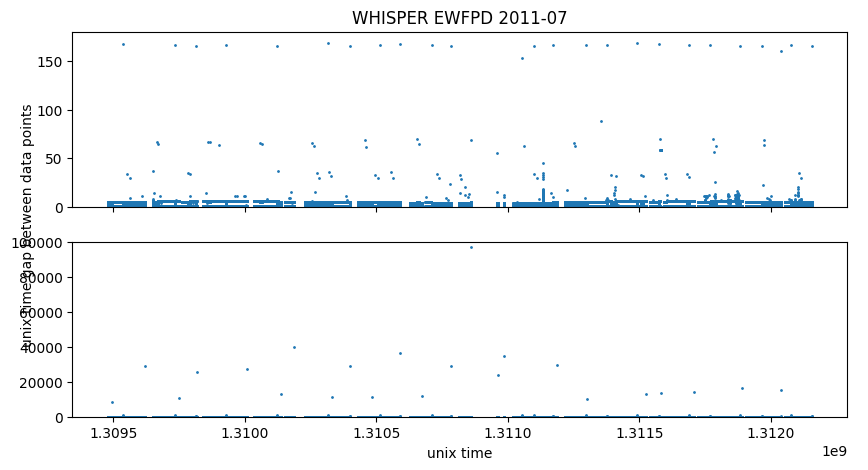

CPU times: total: 50.5 s
Wall time: 51.1 s


In [14]:
%%time

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,5),sharex=True)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
ax1.scatter(t_utc[:-1],t_diff,s=1)
ax2.scatter(t_utc[:-1],t_diff,s=1)
ax1.set_ylim(0,180)
ax2.set_ylim(0,1e5)
ax2.set_xlabel('unix time')
plt.ylabel('unix time gap between data points')
ax1.set_title('WHISPER EWFPD 2011-07')
plt.savefig('whi_ewfpd_117_gap.png',dpi=300,bbox_inches='tight')
plt.show()